In [1]:
import pandas as pd
import numpy as np

# Load the training dataset
file_path = 'train.csv'
train_data = pd.read_csv(file_path)

train_data.head()


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [2]:
# Identifying the columns with medically unreasonable zero values
columns_to_replace_zeros = ['glucose_concentration', 'blood_pressure', 
                            'skin_fold_thickness', 'serum_insulin', 'bmi']

# Replacing zeros with NaN for later imputation
for col in columns_to_replace_zeros:
    train_data[col].replace(0, np.nan, inplace=True)

# Checking for missing values after replacement
missing_values = train_data[columns_to_replace_zeros].isnull().sum()
missing_values_percentage = (missing_values / len(train_data)) * 100

missing_values, missing_values_percentage


(glucose_concentration      4
 blood_pressure            31
 skin_fold_thickness      187
 serum_insulin            304
 bmi                       10
 dtype: int64,
 glucose_concentration     0.651466
 blood_pressure            5.048860
 skin_fold_thickness      30.456026
 serum_insulin            49.511401
 bmi                       1.628664
 dtype: float64)

In [3]:
# Imputing missing values with the mean of each column
for col in columns_to_replace_zeros:
    mean_value = train_data[col].mean()
    train_data[col].fillna(mean_value, inplace=True)

# Checking if all missing values have been imputed
imputed_missing_values = train_data[columns_to_replace_zeros].isnull().sum()
imputed_missing_values


glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Preparing the data
X = train_data.drop(['diabetes', 'p_id'], axis=1)  # Features
y = train_data['diabetes']  # Target variable

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Creating a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicting on the validation set
y_pred = clf.predict(X_val_scaled)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

accuracy

0.7479674796747967

In [5]:
report

'              precision    recall  f1-score   support\n\n           0       0.77      0.86      0.81        77\n           1       0.70      0.57      0.63        46\n\n    accuracy                           0.75       123\n   macro avg       0.74      0.71      0.72       123\nweighted avg       0.74      0.75      0.74       123\n'

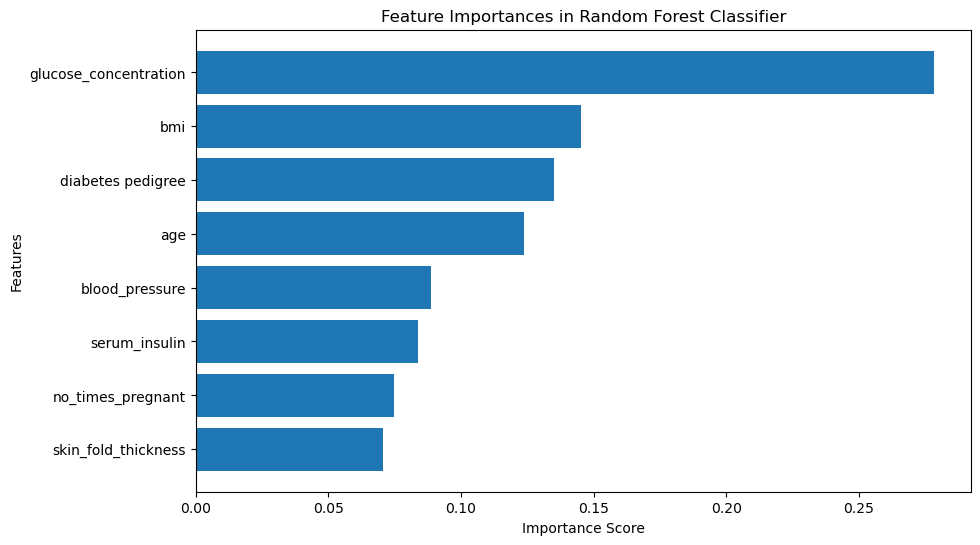

,Feature,Importance
1,glucose_concentration,0.278243
5,bmi,0.145224
6,diabetes pedigree,0.135140
7,age,0.123891
2,blood_pressure,0.088487
4,serum_insulin,0.083727
0,no_times_pregnant,0.074656
3,skin_fold_thickness,0.070631


In [6]:
import matplotlib.pyplot as plt

# Extracting feature importances from the model
feature_importances = clf.feature_importances_
features = X.columns

# Creating a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert the Y-axis for better readability
plt.show()

feature_importance_df


In [7]:
# Selecting top important features based on the previous feature importance analysis
# We will select the top N features. For this example, let's use the top 4 features
top_features = feature_importance_df['Feature'].head(4).tolist()

# Preparing the data with selected features
X_selected_features = train_data[top_features]
y = train_data['diabetes']

# Splitting the data into training and validation sets
X_train_sel, X_val_sel, y_train, y_val = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_val_sel_scaled = scaler_sel.transform(X_val_sel)

# Creating a new Random Forest Classifier
clf_sel = RandomForestClassifier(random_state=42)
clf_sel.fit(X_train_sel_scaled, y_train)

# Predicting on the validation set
y_pred_sel = clf_sel.predict(X_val_sel_scaled)

# Evaluating the model
accuracy_sel = accuracy_score(y_val, y_pred_sel)
report_sel = classification_report(y_val, y_pred_sel)

accuracy_sel

0.7642276422764228

In [8]:
report_sel

'              precision    recall  f1-score   support\n\n           0       0.78      0.87      0.82        77\n           1       0.73      0.59      0.65        46\n\n    accuracy                           0.76       123\n   macro avg       0.75      0.73      0.74       123\nweighted avg       0.76      0.76      0.76       123\n'

In [9]:
# Load the test dataset
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

test_data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [10]:
# Preparing the test data (excluding the patient ID)
X_test = test_data.drop(['p_id','no_times_pregnant','blood_pressure','skin_fold_thickness','serum_insulin'], axis=1)

# Standardizing the test data
X_test_scaled = scaler_sel.transform(X_test)

# Predicting diabetes for the test data
test_predictions = clf_sel.predict(X_test_scaled)

# Adding predictions to the test dataset for review
test_data['predicted_diabetes'] = test_predictions
test_data.head()


,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,predicted_diabetes
0,437,12,140,85,33,0,37.4,0.244,41,1
1,411,6,102,90,39,0,35.7,0.674,28,0
2,639,7,97,76,32,91,40.9,0.871,32,0
3,213,7,179,95,31,0,34.2,0.164,60,1
4,181,6,87,80,0,0,23.2,0.084,32,0


In [11]:
# Formatting the predictions in the required format
submission = test_data[['p_id', 'predicted_diabetes']]

submission.head()

,p_id,predicted_diabetes
0,437,1
1,411,0
2,639,0
3,213,1
4,181,0


In [12]:
# Saving the formatted predictions to a CSV file
submission_file_path = 'diabetes_predictions_submission.csv'
submission.to_csv(submission_file_path, index=False)

submission_file_path

'diabetes_predictions_submission.csv'